In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
matplotlib.__version__

'3.4.3'

In [3]:
DOE_NAME = "doe1"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [4]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [5]:
df_res.columns

Index(['experiment_id', 'lr', 'epochs', 'max_time', 'batch_size', 'seq_len',
       'seq_est_len', 'est_type', 'est_hidden_size', 'seed', 'FIT'],
      dtype='object')

In [6]:
#df_res['est_type'] = df_res['est_type'].replace(['RAND', 'ZERO', 'LSTM', 'FF'], ['R', 'Z', 'L', 'F'])

In [7]:
df_res['est_type']

0      ZERO
1        FF
2      LSTM
3      RAND
4      RAND
       ... 
427    ZERO
428    ZERO
429    LSTM
430    ZERO
431    ZERO
Name: est_type, Length: 432, dtype: object

In [8]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [9]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

In [10]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
22,297,0.001,10000,1800,128,256,40,FF,30,294,95.256770
41,55,0.001,10000,1800,32,64,10,FF,10,425,95.133889
268,35,0.001,10000,1800,1024,512,40,LSTM,10,220,94.948192
59,283,0.001,10000,1800,32,512,10,FF,30,19,94.886070
156,271,0.001,10000,1800,32,64,10,FF,30,152,94.872825
176,285,0.001,10000,1800,128,512,10,FF,30,226,94.833121
397,3,0.001,10000,1800,128,64,10,LSTM,10,199,94.816719
165,275,0.001,10000,1800,1024,64,10,FF,30,339,94.791857
149,33,0.001,10000,1800,128,512,40,LSTM,10,427,94.644075
45,291,0.001,10000,1800,128,64,40,FF,30,286,94.635481


In [11]:
df_res.tail(5)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
376,108,0.001,10000,300,32,64,10,ZERO,10,75,77.589035
247,378,0.001,10000,300,32,64,10,RAND,30,290,77.503601
313,166,0.001,10000,300,1024,64,10,RAND,10,208,77.429176
372,327,0.001,10000,1800,128,64,10,ZERO,30,369,77.261703
399,325,0.001,10000,1800,32,64,10,ZERO,30,0,72.638771


In [12]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# Figure 1: FIT vs factors
### Plot showing the effect of differnt factors on FIT: for a given plot FIT is averged over other parameters

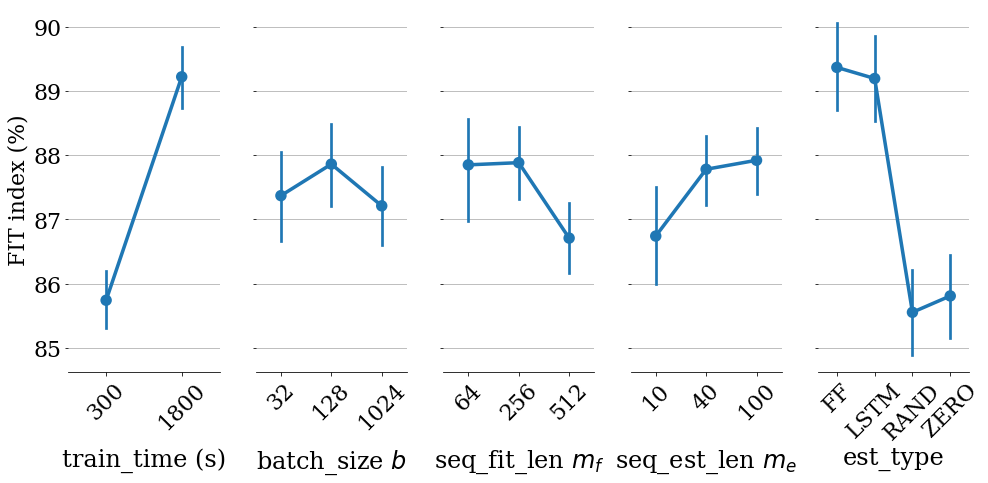

In [13]:
# Full results: main effects
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["train_time (s)",
                "batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]

g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx], fontsize = 24)
    g.axes[0, idx].xaxis.set_tick_params(labelsize=22, rotation=45)
    g.axes[0,idx].grid(axis="y")
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)", fontsize = 22)
g.axes[0, 0].yaxis.set_tick_params(labelsize=22)

g.fig.align_xlabels()
g.fig.set_size_inches(14,7)

plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors.eps')

# Figure 2: Effect of training times on the factors

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


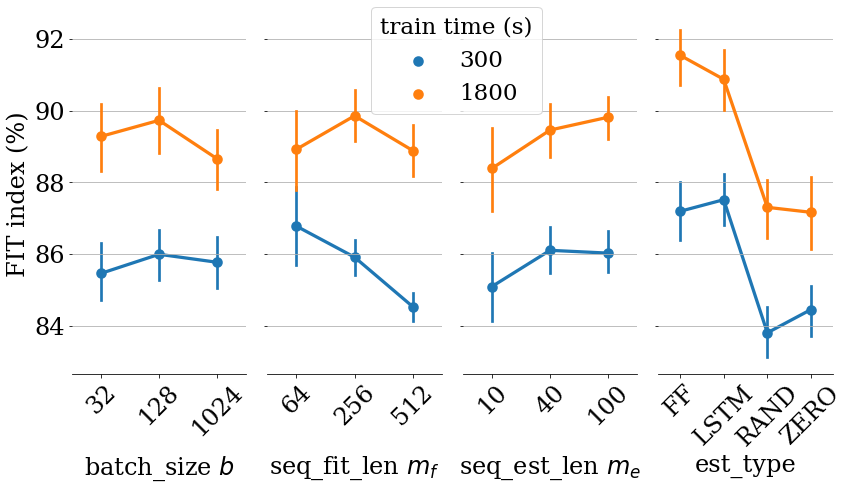

In [14]:
factors = ["batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_res, y_vars= response, x_vars= factors, 
                hue = "max_time",
                height = 5, aspect = .5)
g.map(sns.pointplot, scale = 1.2)
sns.despine(fig = g.fig, left = True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx], fontsize = 24)
    g.axes[0, idx].xaxis.set_tick_params(labelsize=24, rotation=45)
    g.axes[0,idx].grid(axis="y")
g.axes[0, 0].yaxis.set_label_text("FIT index (%)", fontsize = 24)  


g.fig.align_xlabels()
g.fig.set_size_inches(12,7)
plt.tight_layout()
#g.add_legend(title = "train time (s)", fontsize = 24)
plt.legend(title = "train time (s)", fontsize='23', title_fontsize='23',bbox_to_anchor=(-0.6,1.05), frameon=True)
#plt.setp(g._legend().get_texts(), fontsize='24') # for legend text
#plt.setp(g._legend().get_title(), fontsize='24') # for legend title
g.axes[0, 0].yaxis.set_tick_params(labelsize=24)


#plt.legend(title="train time (s)")
plt.savefig('figures/PP_train_time_effect.eps')


# Figure 3: Effect of short estimator lenght and estimators for max_time

In [15]:
df_short_est_max_time = df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 1800)]

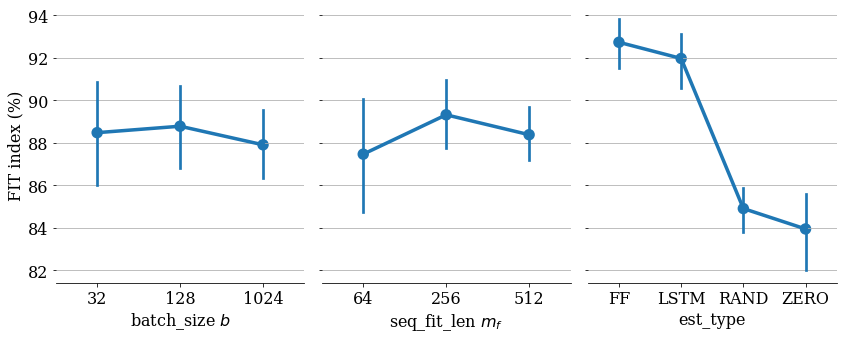

In [16]:
# Full results: main effects
factors = ["batch_size", "seq_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
               "est_type"]

g = sns.PairGrid(df_short_est_max_time, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0,idx].grid(axis="y")
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")

g.fig.set_size_inches(12,5)

plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors_maxTime_shortEst.eps')

 # Figure 4: Effect of short fit lenght vs est_len and estimators

In [17]:
df_short_est_max_time["est_type"] = df_short_est_max_time["est_type"].replace({"R": "RAND", "F": "FF", "Z": "ZERO", "L": "LSTM"})

C:\Users\install\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


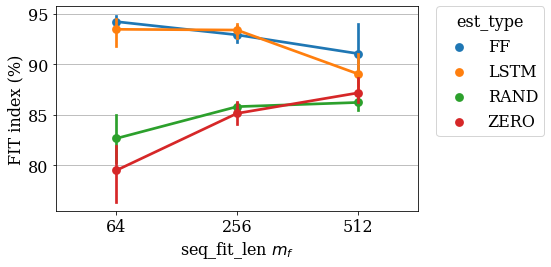

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_len", y=response, data=df_short_est_max_time, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$")
g.axes.grid(axis="y")
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_short_est_seq_vs_fit_seq.eps")

## Figure 4: Effect of short estimation length and minimum training time

In [19]:
df_short_est_min_time = df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 300)]

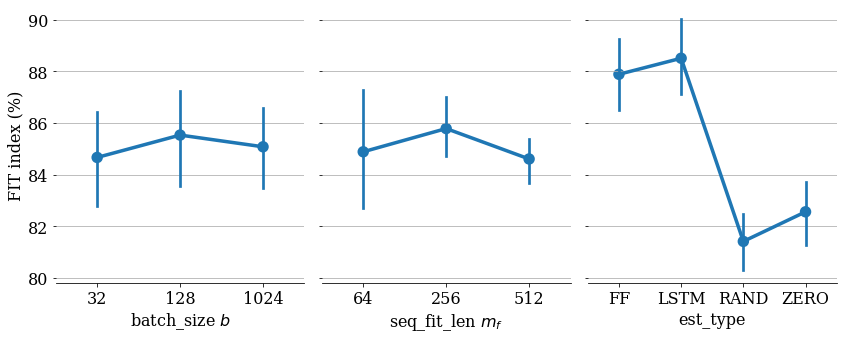

In [20]:
# Full results: main effects
factors = ["batch_size", "seq_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
               "est_type"]

g = sns.PairGrid(df_short_est_min_time, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0,idx].grid(axis="y")
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")

g.fig.set_size_inches(12,5)

plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors_minTime_shortEst.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


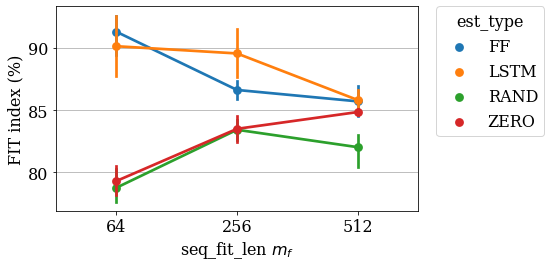

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_len", y=response, data=df_short_est_min_time, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$")
g.axes.grid(axis="y")
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_short_est_seq_vs_fit_seq_MINtime.eps")

 # Figure 5: Effect of short fit lenght vs est_len and estimators

In [22]:
df_short_fit_max_time = df_res[(df_res["seq_len"] == 64) & (df_res["max_time"] == 1800)]

In [23]:
df_short_fit_max_time

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
41,55,0.001,10000,1800,32,64,10,FF,10,425,95.133889
156,271,0.001,10000,1800,32,64,10,FF,30,152,94.872825
397,3,0.001,10000,1800,128,64,10,LSTM,10,199,94.816719
165,275,0.001,10000,1800,1024,64,10,FF,30,339,94.791857
45,291,0.001,10000,1800,128,64,40,FF,30,286,94.635481
...,...,...,...,...,...,...,...,...,...,...,...
72,329,0.001,10000,1800,1024,64,10,ZERO,30,304,81.443520
420,111,0.001,10000,1800,128,64,10,ZERO,10,81,80.658424
217,379,0.001,10000,1800,32,64,10,RAND,30,28,77.972755
372,327,0.001,10000,1800,128,64,10,ZERO,30,369,77.261703


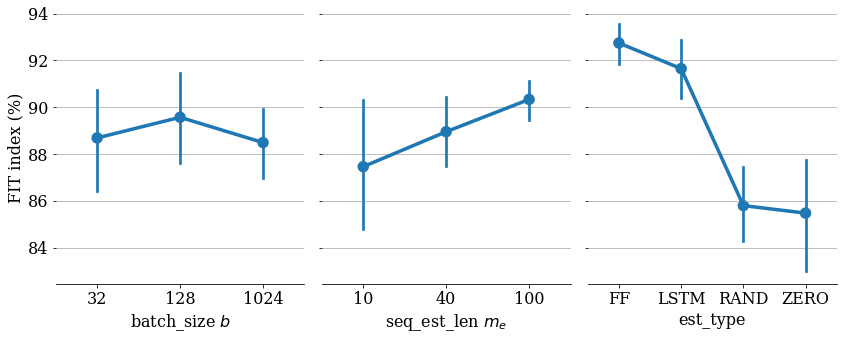

In [24]:
factors = [ "batch_size",  "seq_est_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_est_len $m_e$",
                "est_type"]

g = sns.PairGrid(df_short_fit_max_time, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0,idx].grid(axis="y")
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")

g.fig.set_size_inches(12,5)

plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors_shortFIT_MAXtime.eps')

In [25]:
df_short_fit_max_time["est_type"] = df_short_fit_max_time["est_type"].replace({"R": "RAND", "F": "FF", "Z": "ZERO", "L": "LSTM"})

C:\Users\install\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


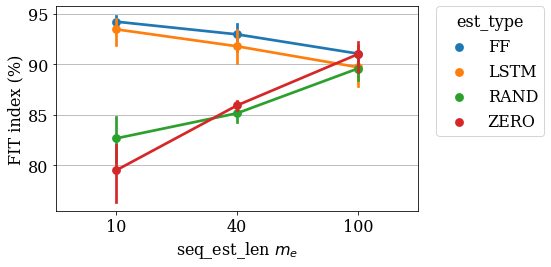

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_est_len", y=response, data=df_short_fit_max_time, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$")
g.axes.grid(axis="y")
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_short_fit_seq_vs_est_seq.eps")

In [27]:
df_count_rand = df_short_fit_max_time[(df_short_fit_max_time["seq_est_len"] == 100) & (df_short_fit_max_time["est_type"] == 'RAND')]
df_count_rand

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
193,417,0.001,10000,1800,128,64,100,RAND,30,70,91.641632
167,203,0.001,10000,1800,1024,64,100,RAND,10,367,91.069069
419,419,0.001,10000,1800,1024,64,100,RAND,30,292,90.995232
424,415,0.001,10000,1800,32,64,100,RAND,30,396,88.028290
387,201,0.001,10000,1800,128,64,100,RAND,10,349,87.970078
253,199,0.001,10000,1800,32,64,100,RAND,10,331,87.768234


In [28]:
df_count_zero = df_short_fit_max_time[(df_short_fit_max_time["seq_est_len"] == 100) & (df_short_fit_max_time["est_type"] == 'ZERO')]
df_count_zero

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
388,365,0.001,10000,1800,1024,64,100,ZERO,30,57,92.784256
364,149,0.001,10000,1800,1024,64,100,ZERO,10,219,92.242561
134,147,0.001,10000,1800,128,64,100,ZERO,10,232,91.374641
132,145,0.001,10000,1800,32,64,100,ZERO,10,145,91.364334
281,363,0.001,10000,1800,128,64,100,ZERO,30,358,91.065331
137,361,0.001,10000,1800,32,64,100,ZERO,30,267,87.163994


In [29]:
df_count_lstm = df_short_fit_max_time[(df_short_fit_max_time["seq_est_len"] == 100) & (df_short_fit_max_time["est_type"] == 'LSTM')]
df_count_lstm

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
23,253,0.001,10000,1800,32,64,100,LSTM,30,303,92.950707
142,39,0.001,10000,1800,128,64,100,LSTM,10,158,92.295326
186,37,0.001,10000,1800,32,64,100,LSTM,10,363,91.618064
175,257,0.001,10000,1800,1024,64,100,LSTM,30,310,87.315515
32,41,0.001,10000,1800,1024,64,100,LSTM,10,417,87.184910
97,255,0.001,10000,1800,128,64,100,LSTM,30,299,86.907437


# Figure 5: Effect of long  estimator lenght and estimators types 

In [30]:
df_long_est = df_res[(df_res["seq_est_len"] == 100) & (df_res["max_time"] == 1800)]

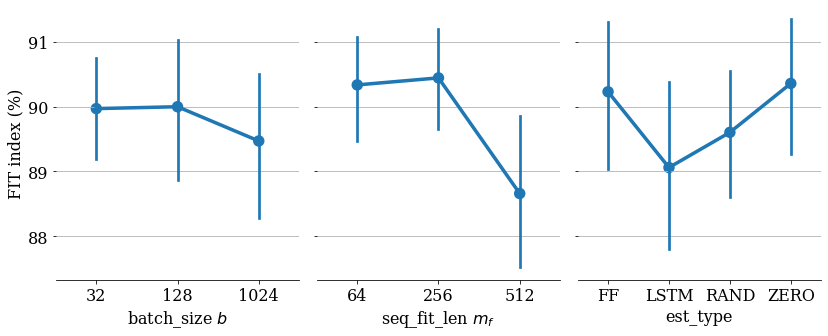

In [31]:
# Full results: main effects
factors = ["batch_size", "seq_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
               "est_type"]

g = sns.PairGrid(df_long_est, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0,idx].grid(axis="y")
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")

g.fig.set_size_inches(12,5)

plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors_maxTime_longEst.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


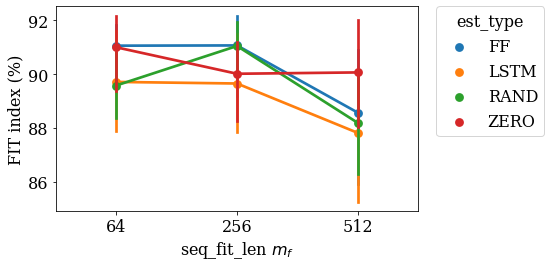

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_len", y=response, data=df_long_est, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_long_est_seq_est_type.eps")

# Figure 6: Effect of long fit lenght, varying seq_est_len and estimators types 

In [33]:
df_long_fit = df_res[(df_res["seq_len"] == 512) & (df_res["max_time"] == 1800)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


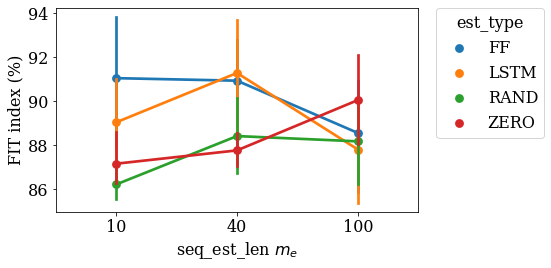

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_est_len", y=response, data=df_long_fit, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_long_fit_seq_est_type.eps")

In [35]:
df_max_time = df_res[df_res["max_time"] == 1800]
df_max_time

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
22,297,0.001,10000,1800,128,256,40,FF,30,294,95.256770
41,55,0.001,10000,1800,32,64,10,FF,10,425,95.133889
268,35,0.001,10000,1800,1024,512,40,LSTM,10,220,94.948192
59,283,0.001,10000,1800,32,512,10,FF,30,19,94.886070
156,271,0.001,10000,1800,32,64,10,FF,30,152,94.872825
...,...,...,...,...,...,...,...,...,...,...,...
72,329,0.001,10000,1800,1024,64,10,ZERO,30,304,81.443520
420,111,0.001,10000,1800,128,64,10,ZERO,10,81,80.658424
217,379,0.001,10000,1800,32,64,10,RAND,30,28,77.972755
372,327,0.001,10000,1800,128,64,10,ZERO,30,369,77.261703


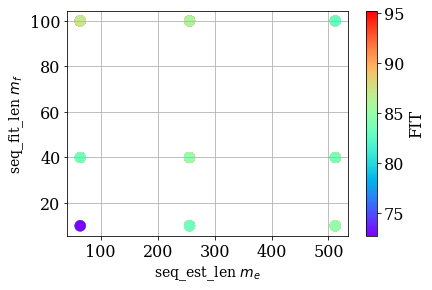

In [36]:
x = df_max_time["seq_len"].to_numpy()
y = df_max_time["seq_est_len"].to_numpy()
z = df_max_time["FIT"].to_numpy()

fig, ax = plt.subplots()
scatter = plt.scatter(x, y, c=z, s=100, cmap = 'rainbow')

#legend1 = ax.legend(*scatter.legend_elements(num=6),
#                    loc="upper right", title="FIT", bbox_to_anchor=(1.4, 1))

#legend1 = ax.legend(
#                    loc="upper right", title="FIT", bbox_to_anchor=(1.4, 1))
#ax.add_artist(legend1)
#plt.colorbar(cax=cax, ax=ax)
plt.colorbar(scatter, label='FIT')
plt.tight_layout(rect=[0,0,1,1])
#plt.tight_layout()
ax.set_xlabel("seq_est_len $m_e$", fontsize = 14)
ax.set_ylabel("seq_fit_len $m_f$", fontsize = 14)

ax.grid(True)

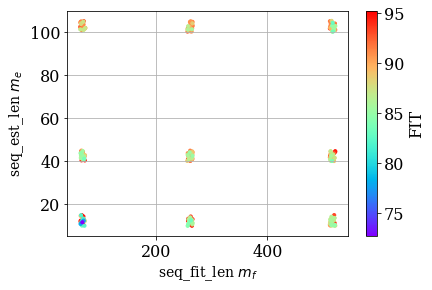

In [37]:
x = x.astype('float32') +  10*np.random.rand(x.size)
y = y.astype('float32') +  5*np.random.rand(x.size)
z = z.astype('float32')

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z, s=10, cmap='rainbow')

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
#legend1 = ax.legend(*scatter.legend_elements(num=6),
#                    loc="upper right", title="FIT", bbox_to_anchor=(1.4, 1))
#ax.add_artist(legend1)
#plt.tight_layout(rect=[0,0,1,1])
plt.colorbar(scatter, label='FIT')
plt.tight_layout(rect=[0,0,1,1])
ax.set_xlabel("seq_fit_len $m_f$", fontsize = 14)
ax.set_ylabel("seq_est_len $m_e$", fontsize = 14)

ax.grid(True)

plt.savefig("figures/PP_max_time_est_vs_fit.eps")